In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

In [2]:
ROWS = 4
COLS = 12
START = (3, 0)
GOAL = (3, 11)
CLIFF = [(3, i) for i in range(1, 11)]

ACTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]
action_symbols = ['↑', '↓', '←', '→']

alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 500

In [3]:
Q = defaultdict(lambda: np.zeros(len(ACTIONS)))

def is_valid(state):
    return 0 <= state[0] < ROWS and 0 <= state[1] < COLS

In [4]:
def step(state, action_index):
    action = ACTIONS[action_index]
    next_state = (state[0] + action[0], state[1] + action[1])
    if not is_valid(next_state):
        next_state = state
    if next_state in CLIFF:
        return START, -100, True
    elif next_state == GOAL:
        return next_state, 0, True
    else:
        return next_state, -1, False

In [5]:
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, len(ACTIONS) - 1)
    else:
        return np.argmax(Q[state])

rewards_per_episode = []

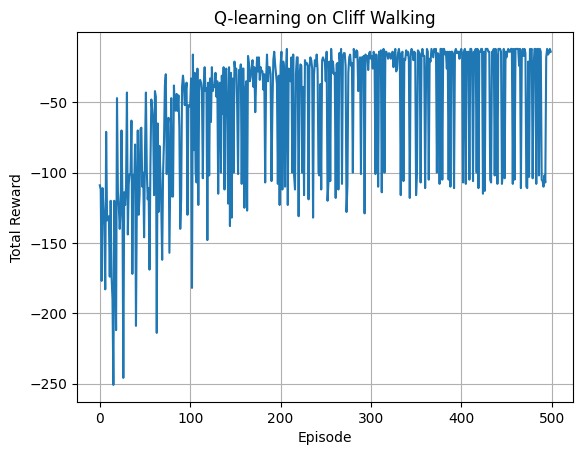

In [6]:
for ep in range(episodes):
    state = START
    total_reward = 0
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        total_reward += reward

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_error = td_target - Q[state][action]
        Q[state][action] += alpha * td_error

        state = next_state

    rewards_per_episode.append(total_reward)

plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-learning on Cliff Walking")
plt.grid(True)
plt.show()

In [7]:
policy_grid = []
for i in range(ROWS):
    row = []
    for j in range(COLS):
        s = (i, j)
        if s in CLIFF:
            row.append('C')
        elif s == GOAL:
            row.append('G')
        elif s == START:
            row.append('S')
        else:
            a = np.argmax(Q[s])
            row.append(action_symbols[a])
    policy_grid.append(row)

print("\nLearned Policy:")
for row in policy_grid:
    print(' '.join(row))


Learned Policy:
→ → → → ↑ ↓ → ↑ → → ↓ ↑
↑ ↓ → ← → → → → → → → ↓
→ → → → → → → → → → → ↓
S C C C C C C C C C C G
